## 传统的聚类方法
聚类或聚类分析是无监督学习问题。它通常被用作数据分析技术，用于发现数据中的有趣模式，例如基于交互行为的用户群体划分。

> 对于所有数据，没有单一的最佳聚类算法。相反，最好探索一系列聚类算法以及每种算法的适用情况。

参考：[https://scikit-learn.org/stable/modules/clustering.html#](https://scikit-learn.org/stable/modules/clustering.html#)

本文中比较下以下算法
- K-Means

### 创建测试数据集

In [1]:
import sklearn
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from collections import Counter
print(sklearn.__version__)

0.23.1


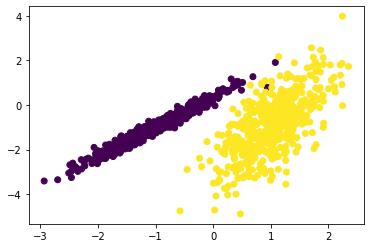

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
Counter(y)
plt.scatter(X[:, 0], X[:, 1], c=y)

### K-Means 聚类
`K-means` 算法是最为经典的基于划分的聚类方法，是十大经典数据挖掘算法之一。K-means算法的基本思想是：以空间中k个点为中心进行聚类，对最靠近他们的对象归类。通过迭代的方法，逐次更新各聚类中心的值，直至得到最好的聚类结果。

K-Means的不足:
K-Means算法的不足，都是由初始值引起的：
- 初始分类数目k值很难估计，不确定应该分成多少类才最合适(ISODATA算法通过类的自动合并和分裂，得到较为合理的类型数目k。)
- 不同的随机种子会得到完全不同的结果(K-Means++算法可以用来解决这个问题，其可以有效地选择初始点)

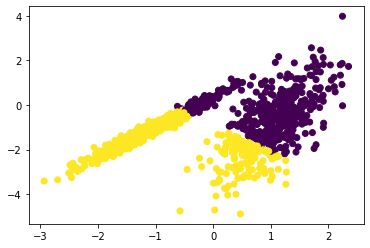

In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init='k-means++')
model.fit(X)
y_ = model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_)

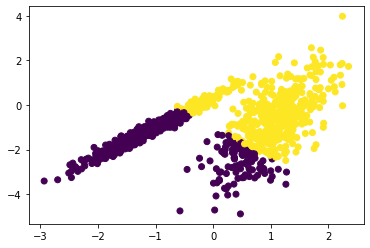

In [11]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=2)
y_ = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_)

### AP 聚类
`AP(Affinity Propagation)`通常被翻译为近邻传播算法或者亲和力传播算法，是在2007年的Science杂志上提出的一种新的聚类算法。AP算法的基本思想是将全部数据点都当作潜在的聚类中心(称之为exemplar)，然后数据点两两之间连线构成一个网络(相似度矩阵)，再通过网络中各条边的消息(responsibility和availability)传递计算出各样本的聚类中心。

AP算法的优点
- 不需要制定最终聚类族的个数 
- 已有的数据点作为最终的聚类中心，而不是新生成一个族中心。 
- 模型对数据的初始值不敏感。 
- 对初始相似度矩阵数据的对称性没有要求。 
- 相比与k-centers聚类方法，其结果的平方差误差较小。

AP算法的不足
- AP算法需要事先计算每对数据对象之间的相似度，如果数据对象太多的话，内存放不下，若存在数据库，频繁访问数据库也需要时间。
- AP算法的时间复杂度较高，一次迭代大概`O(N3)`.
- 聚类的好坏受到参考度和阻尼系数的影响。

D:\DevTools\Miniconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


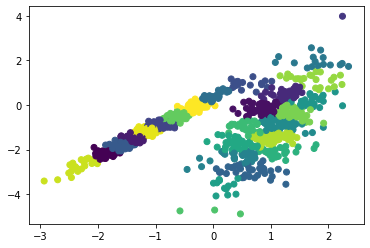

In [15]:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(damping=0.6)
y_ = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_)

### Mean Shift 聚类
`Mean-shift`（即：均值迁移）的基本思想：在数据集中选定一个点，然后以这个点为圆心，r为半径，画一个圆(二维下是圆)，求出这个点到所有点的向量的平均值，而圆心与向量均值的和为新的圆心，然后迭代此过程，直到满足一点的条件结束。

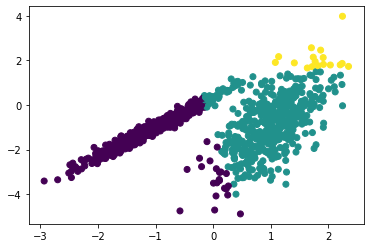

In [16]:
from sklearn.cluster import MeanShift
model = MeanShift()
y_ = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_)

### 谱聚类
Spectral Clustering(SC,即谱聚类)，是一种基于图论的聚类方法,它能够识别任意形状的样本空间且收敛于全局最有解，其基本思想是利用样本数据的相似矩阵进行特征分解后得到的特征向量进行聚类.它与样本特征无关而只与样本个数有关。

基本思路：将样本看作顶点,样本间的相似度看作带权的边,从而将聚类问题转为图分割问题:找到一种图分割的方法使得连接不同组的边的权重尽可能低(这意味着组间相似度要尽可能低),组内的边的权重尽可能高(这意味着组内相似度要尽可能高).

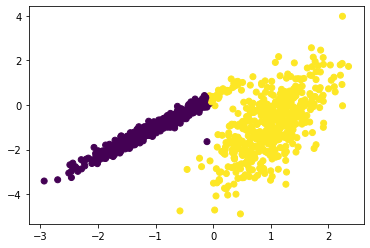

In [19]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2)
y_ = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_)

### 层次聚类
Hierarchical Clustering(层次聚类)：就是按照某种方法进行层次分类，直到满足某种条件为止。

主要分成两类：
- 凝聚：从下到上。首先将每个对象作为一个簇，然后合并这些原子簇为越来越大的簇，直到所有的对象都在一个簇中，或者某个终结条件被满足。
- 分裂：从上到下。首先将所有对象置于同一个簇中，然后逐渐细分为越来越小的簇，直到每个对象自成一簇，或者达到了某个终止条件。（较少用）

算法步骤：
- 将每个对象归为一类, 共得到N类, 每类仅包含一个对象. 类与类之间的距离就是它们所包含的对象之间的距离.
- 找到最接近的两个类并合并成一类, 于是总的类数少了一个.
- 重新计算新的类与所有旧类之间的距离.
- 重复第2步和第3步, 直到最后合并成一个类为止(此类包含了N个对象).

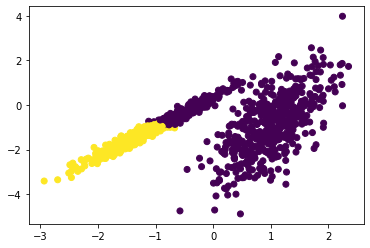

In [25]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering()
y_ = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_)

### DBSCAN 
DBSCAN（Density-Based Spatial Clustering of Applications with Noise,具有噪声的基于密度的聚类方法）是一种基于密度的空间聚类算法。该算法将具有足够密度的区域划分为簇(即要求聚类空间中的一定区域内所包含对象的数目不小于某一给定阈值)，并在具有噪声的空间数据库中发现任意形状的簇，它将簇定义为密度相连的点的最大集合。

算法步骤:
DBSCAN需要二个参数:扫描半径 (eps)和最小包含点数(min_samples)
- 遍历所有点，寻找核心点
- 连通核心点，并且在此过程中扩展某个分类集合中点的个数

算法优缺点
优点:可以发现任意形状的聚类
缺点:
- 随着数据量的增加，对I/O、内存的要求也随之增加。
- 如果密度分布不均匀，聚类效果较差

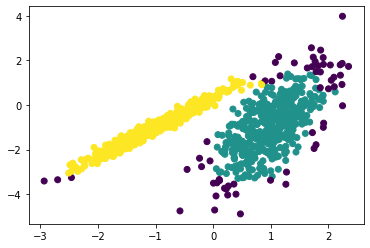

In [24]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.30, min_samples=10)
y_ = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_)

### OPTICS 聚类
OPTICS 是上述 DBSCAN 的修改版本，为聚类分析引入了一种新的算法，它不会显式地生成一个数据集的聚类；而是创建表示其基于密度的聚类结构的数据库的增强排序。此群集排序包含相当于密度聚类的信息，该信息对应于范围广泛的参数设置。

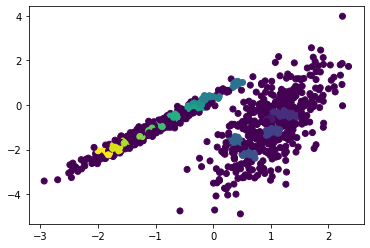

In [26]:
from sklearn.cluster import OPTICS
model = OPTICS(eps=0.30, min_samples=10)
y_ = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_)

### Birch
BIRCH 聚类（ BIRCH 是平衡迭代减少的缩写，聚类使用层次结构)包括构造一个树状结构，从中提取聚类质心。

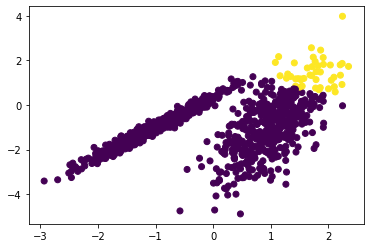

In [30]:
from sklearn.cluster import Birch
model = Birch(n_clusters=2)
y_ = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_)

### 高斯混合模型 GMM
正态分布也叫高斯分布，正太分布的概率密度曲线也叫高斯分布概率曲线。

聚类算法大多数通过相似度来判断，而相似度又大多采用欧式距离长短作为衡量依据。而GMM采用了新的判断依据：概率，即通过属于某一类的概率大小来判断最终的归属类别。

GMM的基本思想就是：任意形状的概率分布都可以用多个高斯分布函数去近似，也就是说GMM就是有多个单高斯密度分布（Gaussian）组成的，每个Gaussian叫一个"Component"，这些"Component"线性加成在一起就组成了 GMM 的概率密度函数，也就是下面的函数。

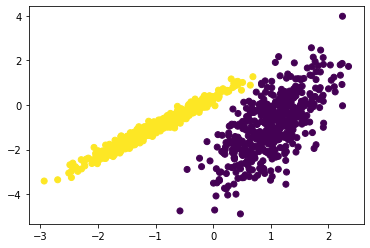

In [32]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=2, covariance_type='full')
y_ = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_)